# HW01

최재필 


In [22]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from itertools import combinations
from scipy.stats import binom

from tqdm import tqdm

## Problem 1

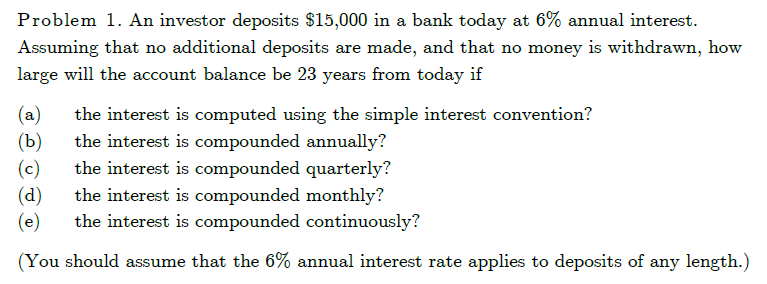

In [4]:
deposit = 15000
r = 0.06
years = 23


### a. simple interest convention

In [5]:
deposit * (1 + r * years)

35700.0

### b. compounded annually

In [6]:
EAR = r
t = years
deposit * ((1+EAR) ** t)

57296.24492359587

### c. compounded quarterly

In [7]:
EAR = r / 4
t = years * 4
deposit * ((1+EAR) ** t)

59015.64336415907

### d. compounded monthly

In [8]:
EAR = r / 12
t = years * 12
deposit * ((1+EAR) ** t)

59418.858440729586

### e. compounded continuously

In [9]:
EAR = r
t = years
deposit * np.exp(r*t)

59623.52441242122

## Problem 2

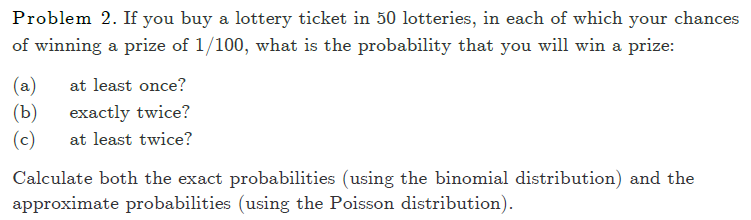

binominal distribution을 통해 구할 때, 

$$ C(n, k) $$ 

를 통해 이항분포를 구함. 

Poisson 포아송 분포의 경우엔 잘 몰라서 찾아보며 봄. 

https://www.youtube.com/watch?v=JOWYEDwqAtY

이항분포에서 n은 계속 커지고, p는 계속 작아질 때의 분포. 즉, 이항분포의 특수한 경우. 

시행 횟수 n과 확률 p는 알 수 없지만, 이항분포의 평균인 n * p 는 알 수 있다. 

이것을 lambda 람다 라고 놓는다. 

In [10]:
lotteries = 50
win_p = 1/100

### a. at least once

$$ 1 - \binom{50}{0} \times (\frac{1}{100})^{0} \times (\frac{99}{100})^{50}  $$

In [11]:
c = len(list(combinations(range(lotteries), 0)))

1 - c * (win_p ** 0) * ((1-win_p) ** (lotteries - 0))

0.39499393286246365

### b. exactly twice

$$ \binom{50}{2} \times (\frac{1}{100})^{2} \times (\frac{99}{100})^{48}  $$

In [12]:
c = len(list(combinations(range(lotteries), 2)))

c * (win_p ** 2) * ((1-win_p) ** (lotteries - 2))

0.07561804226543029

### c. at least twice

$$ 1 - \binom{50}{1} \times (\frac{1}{100})^{1} \times (\frac{99}{100})^{49} - \binom{50}{0} \times (\frac{1}{100})^{0} \times (\frac{99}{100})^{50} $$

In [13]:
c = len(list(combinations(range(lotteries), 1)))
exactly_1 = c * (win_p ** 1) * ((1-win_p) ** (lotteries - 1))

c = len(list(combinations(range(lotteries), 0)))
exactly_0 = c * (win_p ** 0) * ((1-win_p) ** (lotteries - 0))

1 - exactly_1 - exactly_0

0.08943531309603114

## Problem 3

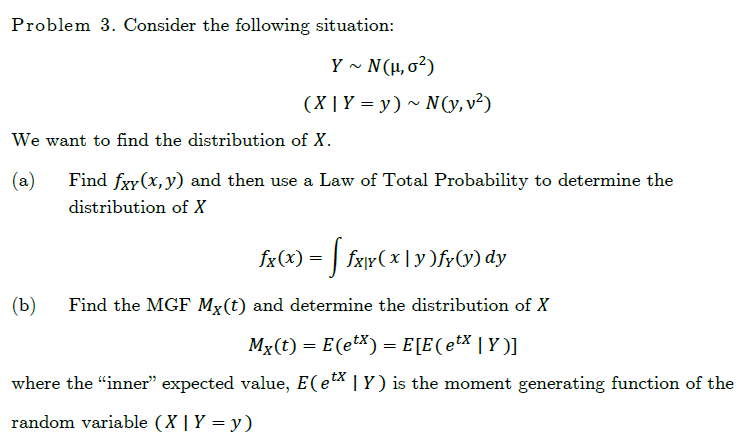

### a. 

### b. 

## Problem 4

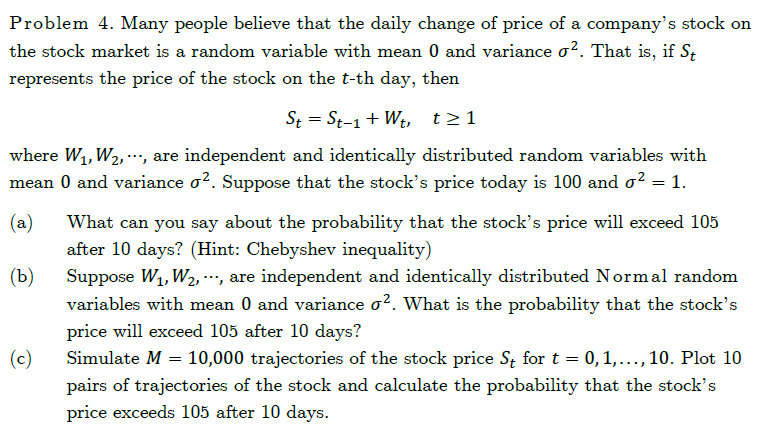

### a. p that the stock price >= 105 in 10 days?

https://www.statlect.com/fundamentals-of-probability/Chebyshev-inequality

Chebyshev's inequality is a probabilistic inequality. It provides an upper bound to the probability that the absolute deviation of a random variable from its mean will exceed a given threshold.

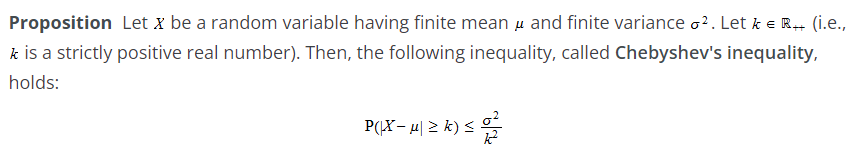

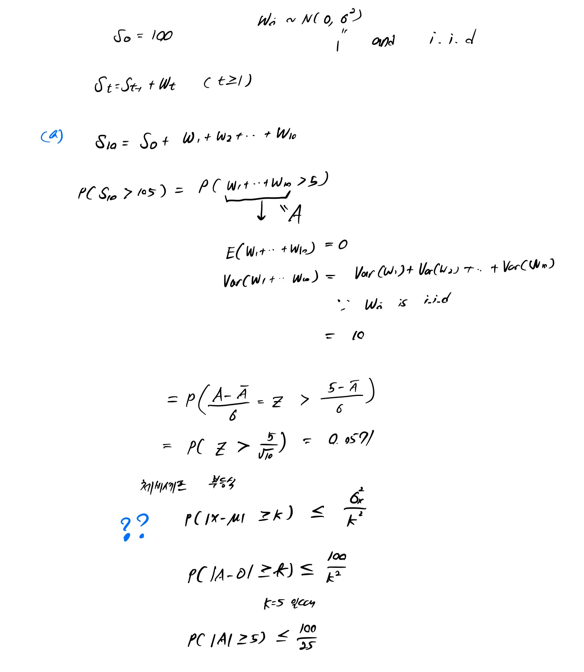

이 부분은 최우혁님이 올린거 참고했습니다. 

### c. Draw the trajectories

and calculate probabilities empirically using monte carlo. 

In [16]:
def stock_process(days, initial_price=100, mean=0, variance=1):
    price_list = [initial_price]
    for d in range(days):
        price = price_list[-1] + np.random.normal(mean, variance ** 1/2)
        price_list.append(price)

    return price_list

In [18]:
M = 10000

In [19]:
trajectories = []

for i in range(M):
    trajectories.append(stock_process(days=10))

In [27]:
traj_df = pd.DataFrame(trajectories).T

<AxesSubplot: >

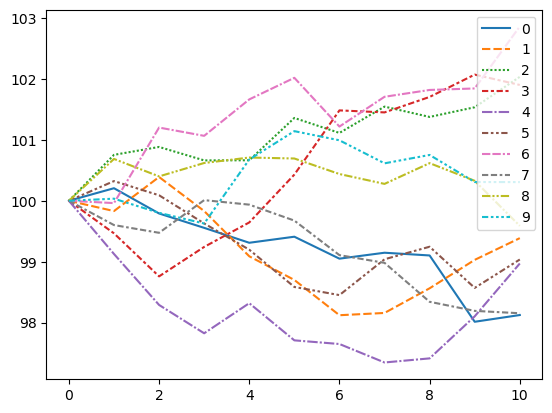

In [29]:
sns.lineplot(traj_df.iloc[:, :10])

In [20]:
len([t for t in trajectories if t[-1] > 105])

7

In [21]:
len([t for t in trajectories if t[-1] > 105]) / M

0.0007

## Problem 5

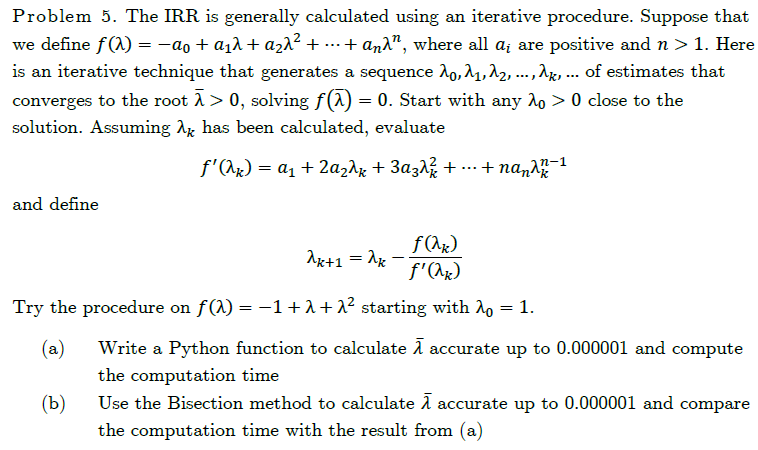

### a.

### b.

## Problem 6

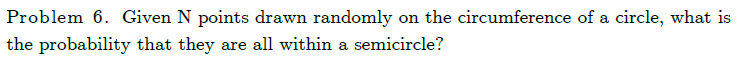

initial guess:

binominal?

In [27]:
p = 1/2
N = 10

c = len(list(combinations(range(N), N)))

c * (p ** N) * ((1-p) ** (N - N))

0.0009765625

하지만 반원이 고정된 것이 아니고, 반원을 돌려가며 찍힌 점을 다 담을 수 있으면 그걸로 된거다. 

(그러니까 이항분포로 구하면 안됨.)

(이전에 찍은 것과 다음에 찍은 것이 independent하지도 않기 때문에 poisson 분포도 안됨.)

그 말은 곧, 찍힌 점들의 max distance 가 $ \pi r $ 을 넘지만 않으면 된다는 것임. 

즉, $ N $ 번 시행했을 때 "원" 위에서 찍힌 점들 사이의 max distance가 반원 이하면 되는 것. 

tricky한 부분은, 반원이라 더 짧은 쪽으로 max distance를 골라줘야 한다는 것이다. 

In [46]:
# TRIALS = int(1e+6)
TRIALS = 100

In [74]:
circumference = 10000
N = 10000

In [79]:
def try_within_semicircle(N, circumference):
    is_success = True
    
    dot_list = []
    current_min_dot = -1
    current_max_dot = -1
    current_max_dist = circumference

    def get_max_dist(current_min, current_max, is_within=1):
        if not is_within:
            return current_max - current_min
        else:
            return current_min + (circumference - current_max)

    for i in range(N):
        dot = np.random.randint(0, circumference)
        dot_list.append(dot)
        
        if i == 0:
            current_min_dot = dot
            current_max_dot = dot
        elif i == 1:
            current_min_dot = min(current_min_dot, dot)
            current_max_dot = max(current_max_dot, dot)
            current_max_dist = max(
                get_max_dist(current_min_dot, current_max_dot, is_within=1),
                get_max_dist(current_min_dot, current_max_dot, is_within=0), 
            )
        elif i == 2:
            if current_min_dot <= dot <= current_max_dot:
                is_within = 1
            else:
                is_within = 0

            current_min_dot = min(current_min_dot, dot)
            current_max_dot = max(current_max_dot, dot)

            current_max_dist = get_max_dist(current_min_dot, current_max_dot, is_within=is_within)
        else:
            current_min_dot = min(current_min_dot, dot)
            current_max_dot = max(current_max_dot, dot)

            current_max_dist = get_max_dist(current_min_dot, current_max_dot, is_within=is_within)

        if current_max_dist < circumference / 2:
            is_success = False
            break

    return is_success

In [80]:
success_count = 0

for trial in tqdm(range(TRIALS)):
    if try_within_semicircle(N, circumference):
        success_count += 1

print(f'''
success_count = {success_count}
p = {success_count / TRIALS}
''')

100%|██████████| 100/100 [00:00<00:00, 215.24it/s]


success_count = 18
p = 0.18

